In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as sc
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')

In [ ]:
# Checking for null values
missing_values_count = data.isnull().sum()
print(missing_values_count)
data = data.dropna()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [ ]:
print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# **Data Preproccessing**

In [ ]:
# dropping data ID since its not relevant to the model
data_Id = data['ID']

data = data.drop('ID', axis=1)
# Handling categorical data
le1 = preprocessing.LabelEncoder()
le1.fit(data['Education'])
data['Education'] = le1.transform(data['Education'])


le2 = preprocessing.LabelEncoder()
le2.fit(data['Marital_Status'])
data['Marital_Status'] = le2.transform(data['Marital_Status'])



le3 = preprocessing.LabelEncoder()
le3.fit(data['Dt_Customer'])
data['Dt_Customer'] = le3.transform(data['Dt_Customer'])

In [ ]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,272,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,4,5,64014.0,2,1,207,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,2,2,56981.0,0,0,521,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,3,5,69245.0,0,1,500,8,428,30,...,3,0,0,0,0,0,0,3,11,0


# **Plotting Correlation**

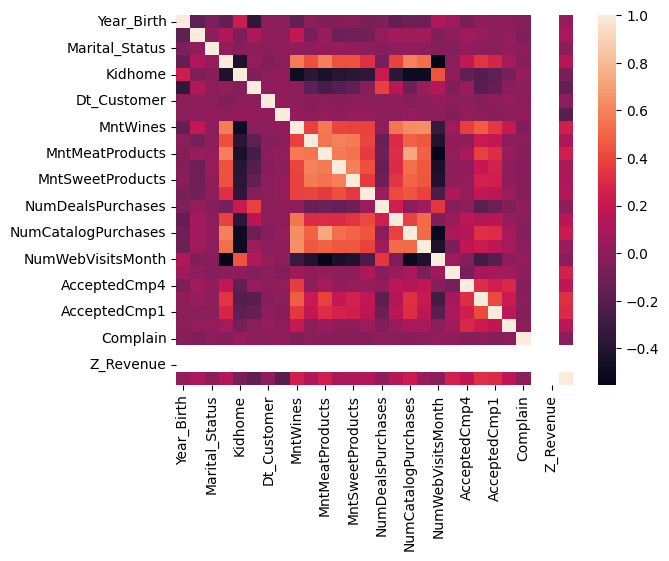

In [ ]:
corrmat = data.corr()
sns.heatmap(corrmat)
plt.show()

# **Checking for class imbalance**

In [ ]:
label_counts = data['Response'].value_counts()
print(label_counts )

Response
0    1883
1     333
Name: count, dtype: int64


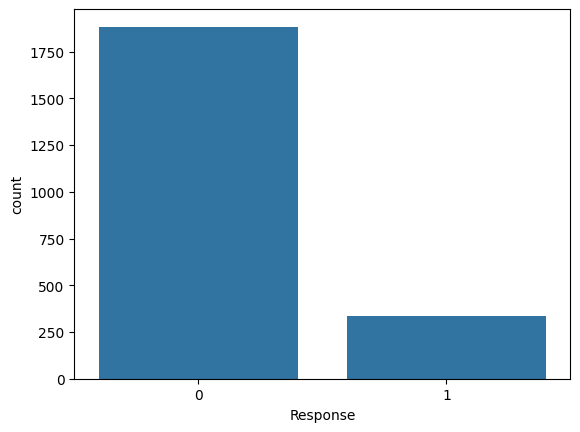

In [ ]:
sns.countplot(x='Response',data=data)
plt.show()

# **Removing highly correlated features**
Among the X Variables we want to remove the highly correlated features(90% correlated with each other)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] > threshold):
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
features_highvar = correlation(data,0.9)
print(features_highvar)

set()


# **Removing low variance features**
• We need to drop constant features and low-variance features since they are not useful in our model \\
• Ideally constant features are those with variance = 0. However to remove both low variance and constant features let’s set our threshold to 0.01(1.00%)


**

In [ ]:
threshold = 0.01
varThreshold = VarianceThreshold(threshold = threshold)
varThreshold.fit(data)
lowVarsFeatures = []
lowVarsFeatures = [column for column in data.columns if column not in data.columns[varThreshold.get_support()]]
print(lowVarsFeatures)
X = data.drop(lowVarsFeatures, axis=1)
X = X.drop(columns='Response')
Y = data['Response']

['Complain', 'Z_CostContact', 'Z_Revenue']


In [ ]:
print(X.shape)
print(Y.shape)

(2216, 24)
(2216,)


# **Create Data split**

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=123)

## **Supervised Learning**

## **Training RandomForest**

In [ ]:
pipeline = Pipeline([

                    ('Standardizer',StandardScaler())
                    ,('rf',RandomForestClassifier())
                    ])
parameters={

            'rf__max_depth': [80, 100,110],
            'rf__max_features': [2, 3],
            'rf__min_samples_leaf': [3, 5],
            'rf__min_samples_split': [8, 12],
            'rf__n_estimators': [100,300, 5]
            }

grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
param_rf = grid_pipeline.best_params_

In [ ]:
print(param_rf)

{'rf__max_depth': 110, 'rf__max_features': 3, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 300}


In [ ]:
best_model = grid_pipeline.best_estimator_
best_model_rf = best_model
y_pred = best_model.predict(X_test)

# **Analysing the model performance**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")


The classification report-
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       567
           1       0.77      0.24      0.37        98

    accuracy                           0.88       665
   macro avg       0.83      0.62      0.65       665
weighted avg       0.87      0.88      0.85       665

The accuracy score is  : 87.82%


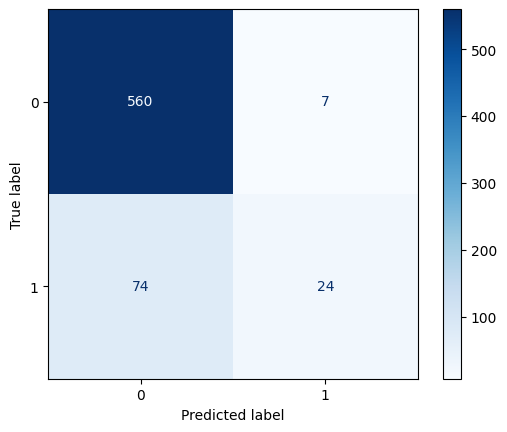

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# **Learning**

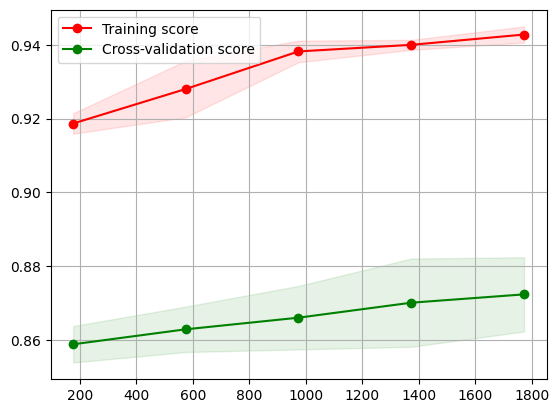

In [ ]:
from sklearn.model_selection import learning_curve
rf = RandomForestClassifier(max_depth=param_rf['rf__max_depth'],max_features=param_rf['rf__max_features'],min_samples_leaf=param_rf['rf__min_samples_leaf'],min_samples_split=param_rf['rf__min_samples_split'],n_estimators=param_rf['rf__n_estimators'])
train_sizes, train_scores, test_scores = learning_curve(rf, X, Y)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# **Training SVM**

In [ ]:
pipeline = Pipeline([
                    ('Standardizer',StandardScaler())
                    ,('svc',SVC())
                    ])

parameters = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['linear']}

grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
param_svc = grid_pipeline.best_params_

print(param_svc)

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}


In [ ]:
best_model = grid_pipeline.best_estimator_
best_model_svc = best_model
y_pred = best_model_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")

The classification report-
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       567
           1       0.70      0.27      0.39        98

    accuracy                           0.88       665
   macro avg       0.79      0.62      0.66       665
weighted avg       0.86      0.88      0.85       665

The accuracy score is  : 87.52%


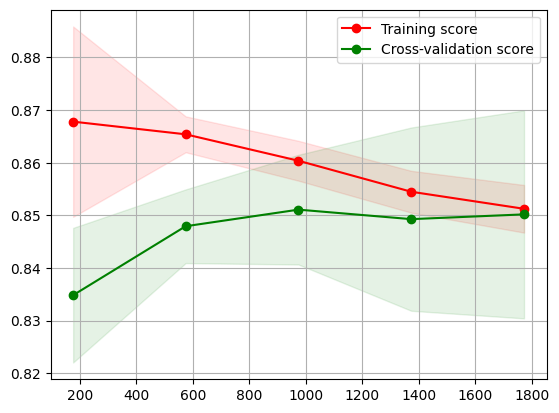

In [ ]:
from sklearn.model_selection import learning_curve

svc = SVC(C=param_svc['svc__C'], gamma=param_svc['svc__gamma'],kernel=param_svc['svc__kernel'])
train_sizes, train_scores, test_scores = learning_curve(svc, X, Y)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# **Analysing the model performance**




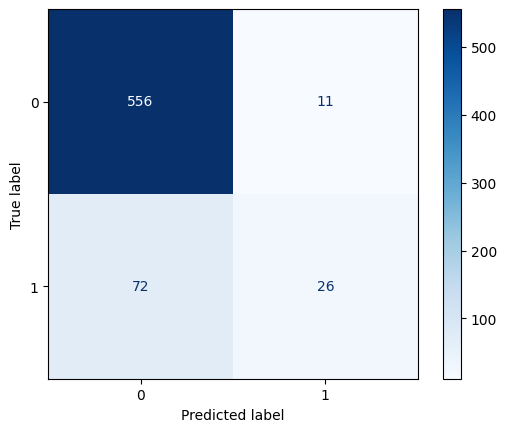

In [ ]:


from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## Training Neural Network


In [ ]:
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
                    ('Standardizer',StandardScaler())
                    ,('nn',MLPClassifier(max_iter=10, random_state=0))
                    ])

parameters = {
    'nn__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'nn__activation': ['tanh', 'relu'],
    'nn__solver': ['sgd', 'adam'],
    'nn__alpha': [0.0001, 0.05],
    'nn__learning_rate': ['constant','adaptive'],
}

grid_pipeline = GridSearchCV(pipeline,parameters,verbose=10, n_jobs=-1)
grid_pipeline.fit(X_train,y_train)
param_nn = grid_pipeline.best_params_

print(param_nn)

best_model = grid_pipeline.best_estimator_
best_model_nn = best_model
y_pred = best_model_nn.predict(X_test)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'nn__activation': 'tanh', 'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (50, 100, 50), 'nn__learning_rate': 'constant', 'nn__solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")

The classification report-
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       567
           1       0.62      0.42      0.50        98

    accuracy                           0.88       665
   macro avg       0.76      0.69      0.71       665
weighted avg       0.86      0.88      0.87       665

The accuracy score is  : 87.67%


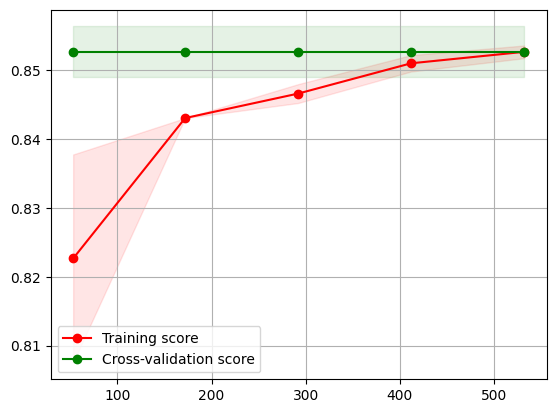

In [ ]:
from sklearn.model_selection import learning_curve
nn = MLPClassifier(activation=param_nn['nn__activation'],alpha=param_nn['nn__alpha'],hidden_layer_sizes=param_nn['nn__hidden_layer_sizes'],learning_rate= param_nn['nn__learning_rate'],solver= param_nn['nn__solver'])
train_sizes, train_scores, test_scores = learning_curve(nn, X_test, y_test)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## **Analysing the model performance**

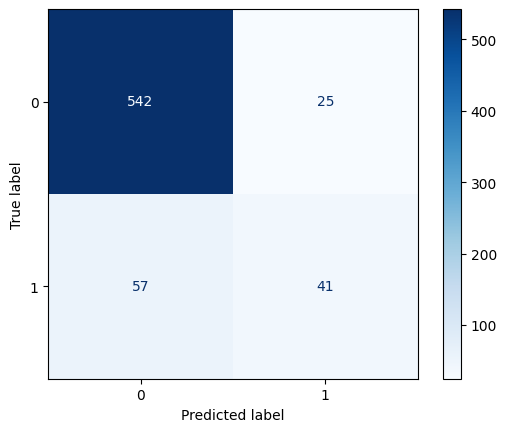

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,272,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,4,5,64014.0,2,1,207,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,2,2,56981.0,0,0,521,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,3,5,69245.0,0,1,500,8,428,30,...,3,0,0,0,0,0,0,3,11,0


#  Unsupervised Clustering





In [ ]:
X_response = data[data['Response']==1]



## K-means



Best parameters found: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 5, 'tol': 0.0001}
Best silhouette score: 0.661284994360437


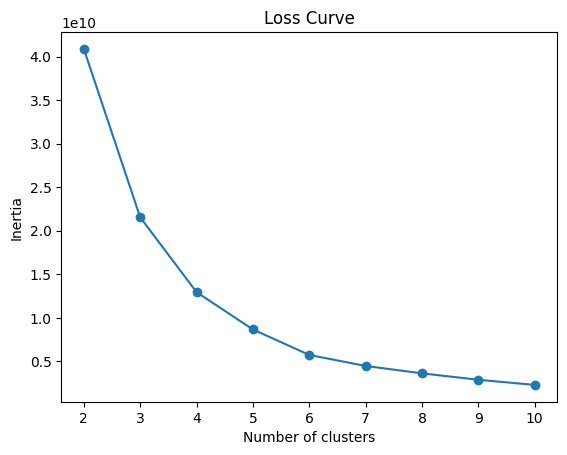

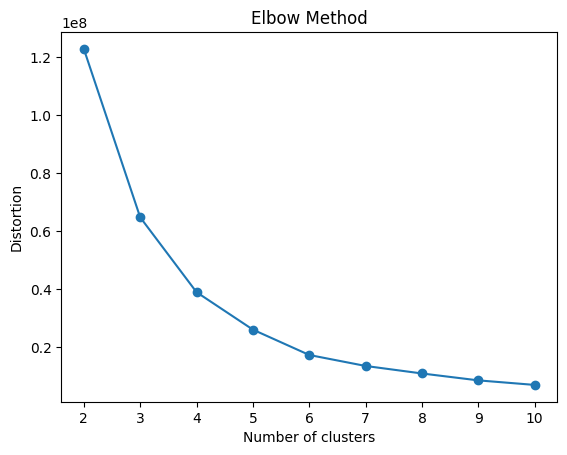

In [ ]:



param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6],
    'algorithm': ['lloyd', 'elkan'],
    'n_init': [5, 10, 20]  # Adjust as needed
}

# Define the clustering model
kmeans = KMeans()

# Define the silhouette scorer (or any other clustering metric)
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=silhouette_scorer)
grid_search.fit(X_response)
print("Best parameters found:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

# Plotting the loss curve
def plot_loss_curve(estimator, X):
    losses = []
    for n_clusters in range(2, 11):
        estimator.set_params(n_clusters=n_clusters)
        estimator.fit(X)
        losses.append(estimator.inertia_)
    plt.plot(range(2, 11), losses, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Loss Curve')
    plt.show()

# Plotting the elbow method
def plot_elbow_method(estimator, X):
    distortions = []
    for n_clusters in range(2, 11):
        estimator.set_params(n_clusters=n_clusters)
        estimator.fit(X)
        distortions.append(sum(np.min(np.square(estimator.transform(X)), axis=1)) / X.shape[0])
    plt.plot(range(2, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Plotting the loss curve and elbow method
plot_loss_curve(KMeans(**grid_search.best_params_), X_response)
plot_elbow_method(KMeans(**grid_search.best_params_), X_response)

## Hierarchical Clustering

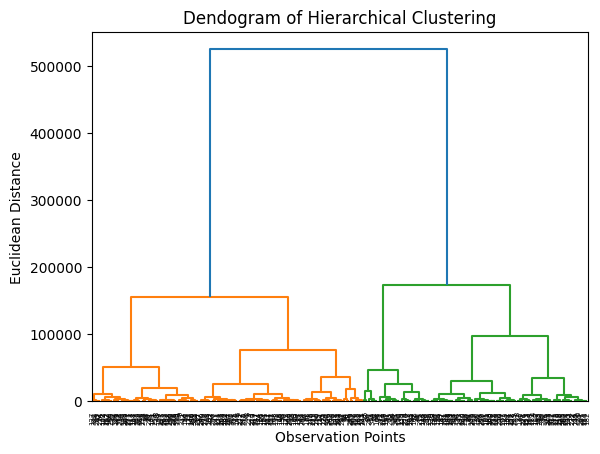

In [ ]:
from scipy.cluster import hierarchy
hier=hierarchy.dendrogram(hierarchy.linkage(X_response, method="ward"))
plt.title("Dendogram of Hierarchical Clustering")
plt.xlabel("Observation Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:

param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['complete', 'average'],
    'metric': ['euclidean',  'manhattan']
}
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

grid_search = GridSearchCV(estimator=AgglomerativeClustering(), param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_response)

print("Best parameters found:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)


Best parameters found: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 2}
Best silhouette score: 0.6472476984004736


In [ ]:

model = AgglomerativeClustering(linkage= 'average', metric= 'euclidean', n_clusters= 2)
label = model.fit_predict(X_response)
print(label)

[1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1]


## OPTICS Clustering

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as sc
from sklearn.cluster import DBSCAN

In [ ]:
X_response.shape

(333, 28)

In [ ]:
param_grid = {
    'min_samples': [5, 10, 15],
    'xi': [0.01, 0.05, 0.1],
    'min_cluster_size': [0.05, 0.1, 0.15]
}

# Define a custom scorer using silhouette score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    return silhouette_avg

# Perform grid search with OPTICS clustering
grid_search = GridSearchCV(estimator=OPTICS(), param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_response)

# Get the best parameters found
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best silhouette score:", best_score)

Best parameters found: {'min_cluster_size': 0.05, 'min_samples': 15, 'xi': 0.1}
Best silhouette score: 0.4822901526937926


## Data Analysis

In [ ]:
X_clustering = X_response

In [ ]:

X_clustering.loc[:, 'clustering_labels'] = label

<ipython-input-44-7f0324ef1540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clustering.loc[:, 'clustering_labels'] = label


In [ ]:
from datetime import datetime

current_year = datetime.now().year
X_clustering['Age'] = current_year - X_clustering['Year_Birth']

<ipython-input-45-ec3203a52273>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clustering['Age'] = current_year - X_clustering['Year_Birth']


In [ ]:
X_clustering

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clustering_labels,Age
0,1957,2,4,58138.0,0,0,80,58,635,88,...,0,0,0,0,0,3,11,1,1,67
8,1974,4,5,30351.0,1,0,119,19,14,0,...,0,0,0,0,0,3,11,1,1,50
15,1946,4,4,82800.0,0,0,517,23,1006,22,...,0,1,1,0,0,3,11,1,0,78
33,1952,4,2,46610.0,0,2,623,8,96,12,...,0,0,0,0,0,3,11,1,1,72
39,1943,4,2,48948.0,0,0,2,53,437,8,...,0,0,0,0,0,3,11,1,1,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,1957,2,3,73803.0,0,1,12,61,833,80,...,0,0,0,0,0,3,11,1,0,67
2198,1954,2,3,50501.0,1,1,376,10,297,0,...,0,0,0,0,0,3,11,1,1,70
2202,1973,4,7,48432.0,0,1,383,3,322,3,...,0,0,0,0,0,3,11,1,1,51
2221,1982,3,4,75777.0,0,0,77,12,712,26,...,1,1,0,0,0,3,11,1,0,42


# Analysing clusters

<ipython-input-47-97ef4a6709ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=X_clustering["clustering_labels"], palette= pal)


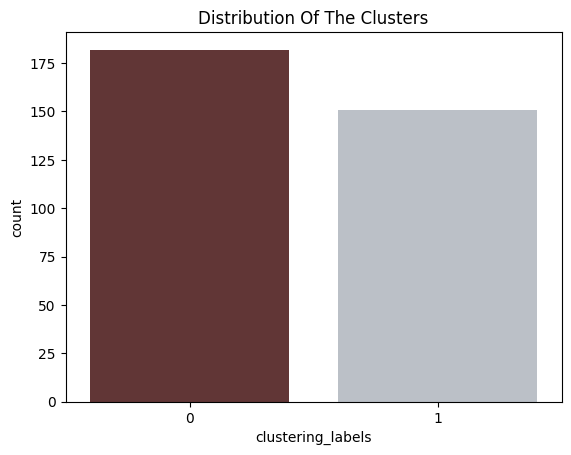

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=X_clustering["clustering_labels"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-48-07ca7afa8235>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["Income"] <= X_clustering["Income"].mean() + 3 * X_clustering["Income"].std()]["Income"], palette=pal)


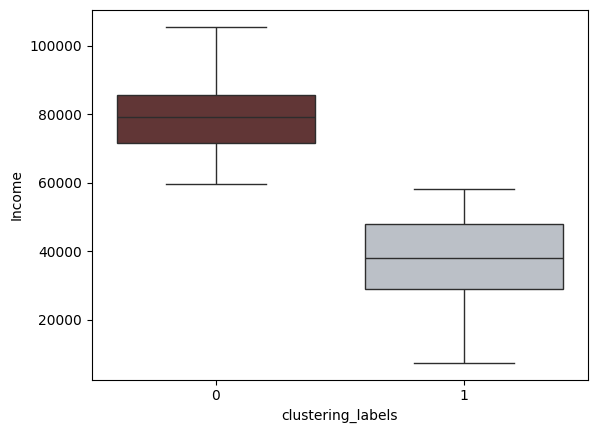

In [ ]:
plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["Income"] <= X_clustering["Income"].mean() + 3 * X_clustering["Income"].std()]["Income"], palette=pal)
plt.show()

<ipython-input-49-f86bdf0f8988>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering["Income"] , palette=pal)


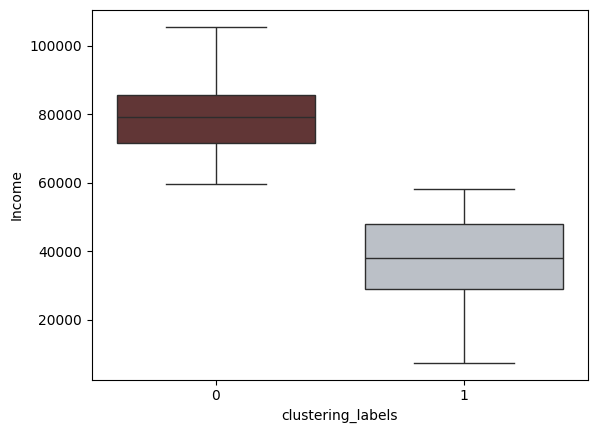

In [ ]:
plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering["Income"] , palette=pal)
plt.show()

<ipython-input-50-9d3848634a6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumWebVisitsMonth"] <= X_clustering["NumWebVisitsMonth"].mean() + 3 * X_clustering["NumWebVisitsMonth"].std()]["NumWebVisitsMonth"], palette=pal)


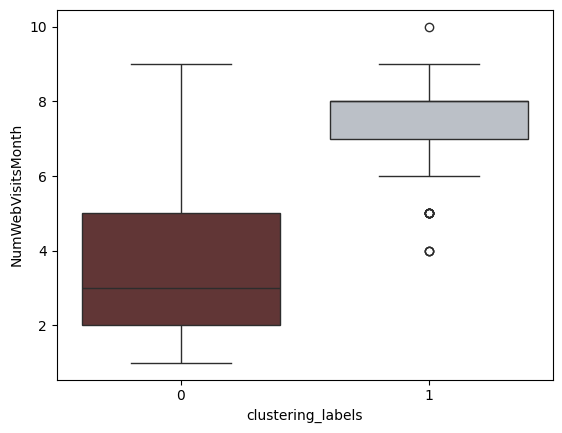

In [ ]:
plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumWebVisitsMonth"] <= X_clustering["NumWebVisitsMonth"].mean() + 3 * X_clustering["NumWebVisitsMonth"].std()]["NumWebVisitsMonth"], palette=pal)
plt.show()

<ipython-input-51-495986d3e6a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumStorePurchases"] <= X_clustering["NumStorePurchases"].mean() + 3 * X_clustering["NumStorePurchases"].std()]["NumStorePurchases"], palette=pal)


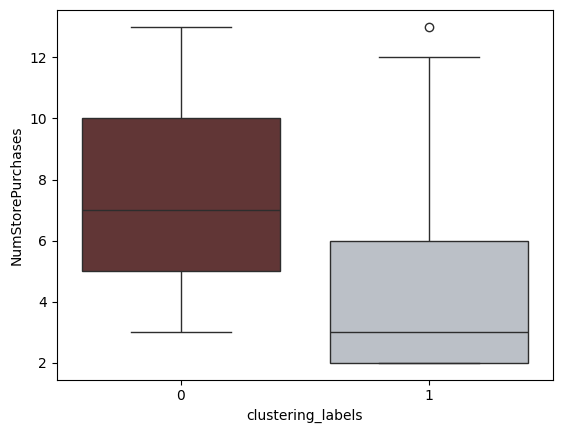

In [ ]:
plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumStorePurchases"] <= X_clustering["NumStorePurchases"].mean() + 3 * X_clustering["NumStorePurchases"].std()]["NumStorePurchases"], palette=pal)
plt.show()

<ipython-input-52-c2290a9cbac8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumCatalogPurchases"] <= X_clustering["NumCatalogPurchases"].mean() + 3 * X_clustering["NumCatalogPurchases"].std()]["NumCatalogPurchases"], palette=pal)


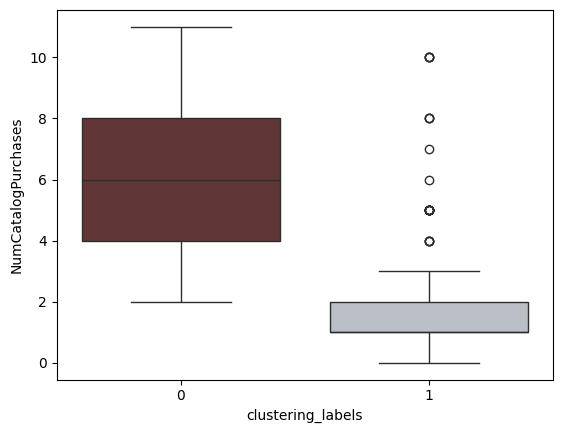

In [ ]:

plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumCatalogPurchases"] <= X_clustering["NumCatalogPurchases"].mean() + 3 * X_clustering["NumCatalogPurchases"].std()]["NumCatalogPurchases"], palette=pal)
plt.show()

<ipython-input-55-86d2bbd36ec2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumWebPurchases"] <= X_clustering["NumWebPurchases"].mean() + 3 * X_clustering["NumWebPurchases"].std()]["NumWebPurchases"], palette=pal)


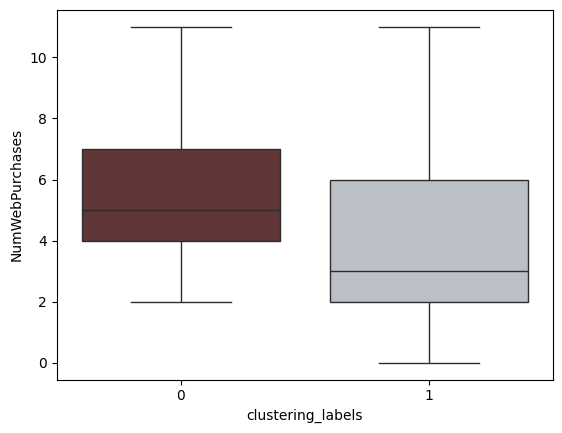

In [ ]:

plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["NumWebPurchases"] <= X_clustering["NumWebPurchases"].mean() + 3 * X_clustering["NumWebPurchases"].std()]["NumWebPurchases"], palette=pal)
plt.show()

<ipython-input-65-c437816f95d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["Age"] <= X_clustering["Age"].mean() + 3 * X_clustering["Age"].std()]["Age"], palette=pal)


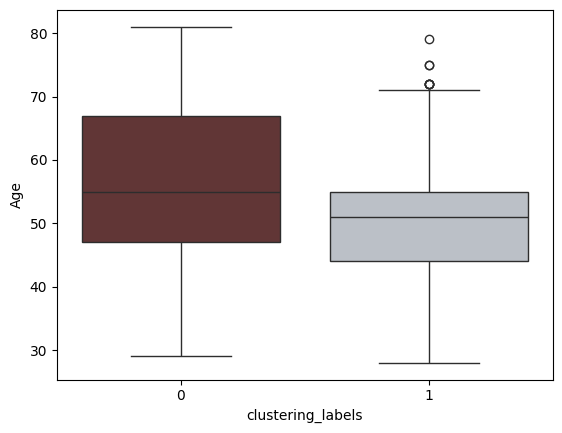

In [ ]:

plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["Age"] <= X_clustering["Age"].mean() + 3 * X_clustering["Age"].std()]["Age"], palette=pal)
plt.show()

<ipython-input-56-936300f6b39b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntWines"] <= X_clustering["MntWines"].mean() + 3 * X_clustering["MntWines"].std()]["MntWines"], palette=pal)


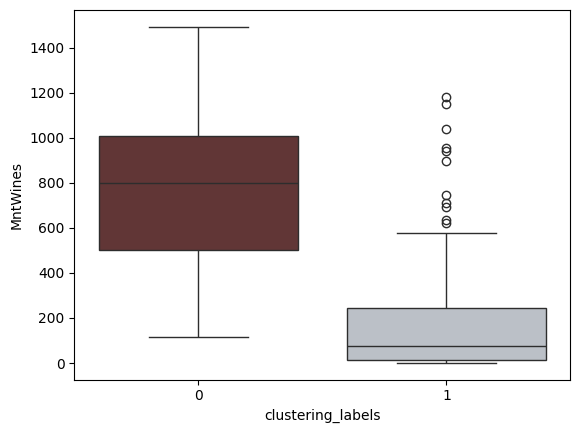

In [ ]:

plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntWines"] <= X_clustering["MntWines"].mean() + 3 * X_clustering["MntWines"].std()]["MntWines"], palette=pal)
plt.show()

<ipython-input-57-96b47a936610>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntMeatProducts"] <= X_clustering["MntMeatProducts"].mean() + 3 * X_clustering["MntMeatProducts"].std()]["MntMeatProducts"], palette=pal)


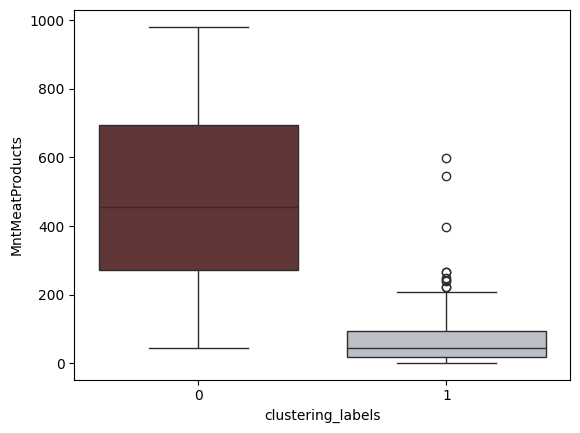

In [ ]:


plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntMeatProducts"] <= X_clustering["MntMeatProducts"].mean() + 3 * X_clustering["MntMeatProducts"].std()]["MntMeatProducts"], palette=pal)
plt.show()

<ipython-input-58-b53eb3e516c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntFishProducts"] <= X_clustering["MntFishProducts"].mean() + 3 * X_clustering["MntFishProducts"].std()]["MntFishProducts"], palette=pal)


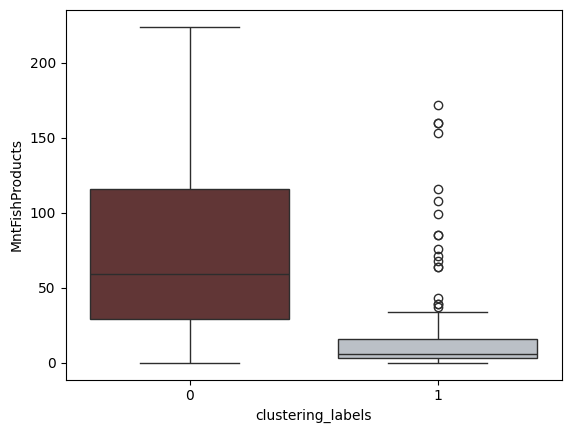

In [ ]:


plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntFishProducts"] <= X_clustering["MntFishProducts"].mean() + 3 * X_clustering["MntFishProducts"].std()]["MntFishProducts"], palette=pal)
plt.show()

<ipython-input-59-96bb23328e26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntSweetProducts"] <= X_clustering["MntSweetProducts"].mean() + 3 * X_clustering["MntSweetProducts"].std()]["MntSweetProducts"], palette=pal)


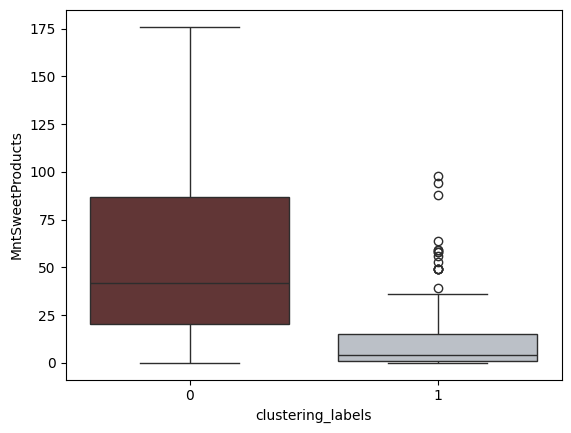

In [ ]:


plt.figure()
pl=sns.boxplot(x=X_clustering["clustering_labels"], y=X_clustering[X_clustering["MntSweetProducts"] <= X_clustering["MntSweetProducts"].mean() + 3 * X_clustering["MntSweetProducts"].std()]["MntSweetProducts"], palette=pal)
plt.show()

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'clustering_labels', 'Age'],
      dtype='object')


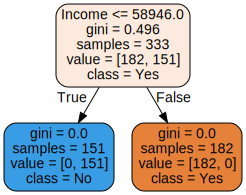

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X_train = X_response
y_train = label
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


import graphviz
export_graphviz(dt, out_file='tree.dot', feature_names=X_response.columns, class_names=["Yes", "No"],
                filled=True, rounded=True)

# Convert the DOT file to a PNG image using Graphviz
with open("tree.dot") as f:
    dot_graph = f.read()

print(X_response.columns)
graphviz.Source(dot_graph)

In [ ]:
export_graphviz(dt, out_file='tree.dot', feature_names=X_response.columns, class_names=["Yes", "No"], filled=True, rounded=True)

# Load the dot file and save it as a PNG image
graph = graphviz.Source.from_file("tree.dot")
graph.render(filename='tree', format='png', cleanup=True)

print(X_response.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'clustering_labels', 'Age'],
      dtype='object')
